# Baseline model to simulate outbreak

#### Author: Yiran Jing

#### Date: Feb 2020


## Contents:
1. EDA and Feature Engineering
1. Polynomial regression
   1. Chinese total comfirmed cases
   2. For each province
   
## Summary
For Polynomial regression, 
- China total comfirmed cases, optimal degree is 2, and seems fit well.
- Hubei, optimal degree is 2.
- Ex-hubei, optimal degree is 3.

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
import pandas
import datetime
import matplotlib.dates as mdates
from helper_fun_model import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
## Update data from DXY
! cd ../data_processing && python DXY_AreaData_query.py

2020-02-11 01:36:50Update records successfully to ../data/DXY_Chinese.csv
Save area daily dataset (English) into ../data/DXYArea.csv
CPU times: user 111 ms, sys: 39 ms, total: 150 ms
Wall time: 8.76 s


In [14]:
## Load data 
df = pd.read_csv("../data/DXYArea.csv")
"""
Data Cleaning 
"""
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] != df['date'].max()] # remove todays' records (since it can be incompleted)
#df = df[df['date'] < datetime.datetime(2020, 2, 10)]

df.tail(3) # check new

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
5739,2020-02-09,泰国,TH,NaN,NaN,32,0,8,0,63,24
5740,2020-02-09,美国,US,NaN,NaN,12,0,3,0,63,9
5741,2020-02-09,越南,VN,NaN,NaN,14,0,3,0,63,11


### EDA

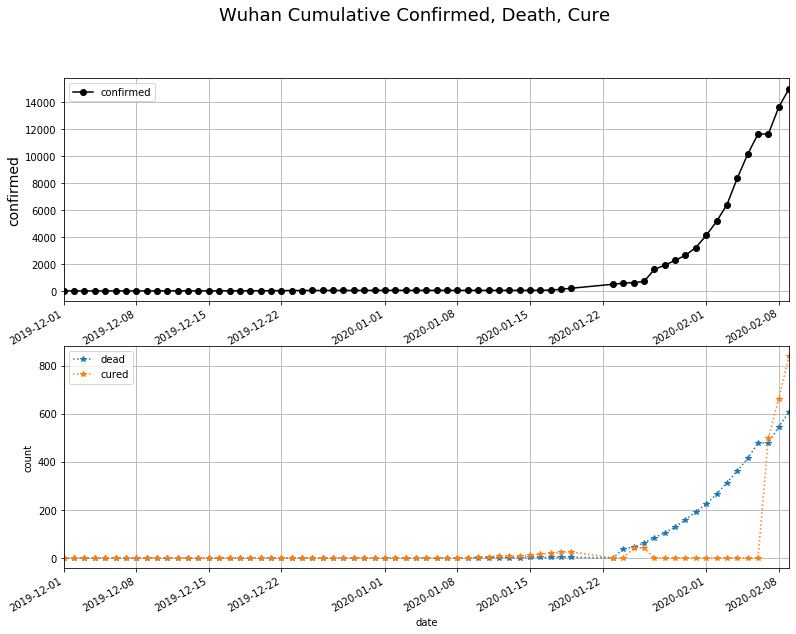

In [15]:
# Input City name or Province name
draw_city_trend("Wuhan", df) # city 

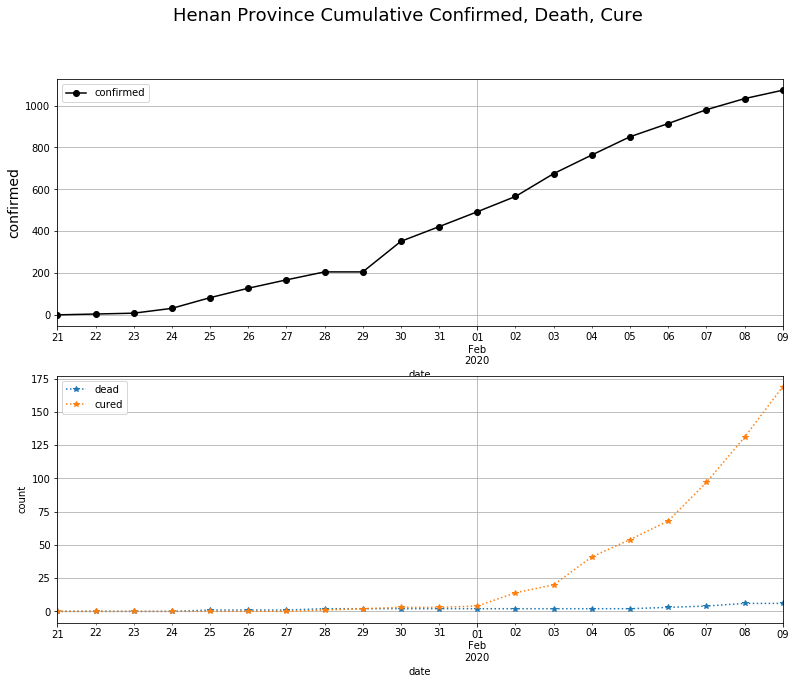

In [16]:
draw_province_trend("Henan Province", get_province_df(df, "Henan Province"))

## Polynomial regression

### Case1: Overall China

In [17]:
"""
Sum up all province within China
"""
# China total
China_df = df[df['date'] > datetime.datetime(2020, 1, 14)] 

China_total = get_China_total(China_df)

Train, Test = split_train_test_by_date(China_total, 5)

X_train = Train['Days']
y_train = Train['confirmed']
X_test =  Test['Days']
y_test = Test['confirmed']

Train dataset: data before 2020-02-04 00:00:00 
Test dataset: the last 5 days


In [18]:
China_total.tail()

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
4042,2020-02-05,中国,CN,NaN,NaN,28018,24702,1153,563,59,26302
4365,2020-02-06,中国,CN,NaN,NaN,31161,26359,1540,636,60,28985
4711,2020-02-07,中国,CN,NaN,NaN,34594,27657,2052,723,61,31819
5056,2020-02-08,中国,CN,NaN,NaN,37162,28942,2651,812,62,33699
5401,2020-02-09,中国,CN,NaN,NaN,40235,23589,3283,909,63,36043


Degree 1:
RMSE of training set is 2854.01991356579
R2 score of training set is 0.7908332503949047

RMSE of test set is 15509.142623379383
R2 score of test set is -7.264011873365975
---------------------------------------

Degree 3:
RMSE of training set is 198.1357013956916
R2 score of training set is 0.9989918988205625

RMSE of test set is 5001.613502537175
R2 score of test set is 0.14052032599281927
---------------------------------------

Degree 2:
RMSE of training set is 581.0829182967894
R2 score of training set is 0.9913292858784779

RMSE of test set is 2078.9712515239876
R2 score of test set is 0.8515048324967187
---------------------------------------



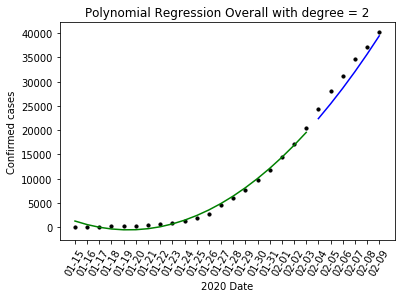

In [19]:
"""
Model selection:
  find optimal degree level
  Then draw plot using the optimal degree
"""
# select the best degree 
create_polynomial_regression_model(1, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Overall", China_total , X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = True)

**based on the result above, we can clearly see that degree = 2 gives us best estimation. So now we use degree = 2 to predict the next 4 days**


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 768.1287189961382
R2 score of training set is 0.9965595484113774

---------------------------------------



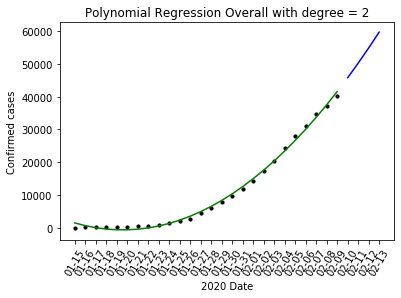

In [20]:
print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Overall", China_total)

### Case2: Each Province

Train dataset: data before 2020-02-04 00:00:00 
Test dataset: the last 5 days
Degree 1:
RMSE of training set is 1956.738916534652
R2 score of training set is 0.7626695686431754

RMSE of test set is 12735.419782565512
R2 score of test set is -7.457339269998677
---------------------------------------

Degree 3:
RMSE of training set is 132.4495379219281
R2 score of training set is 0.9989126019283466

RMSE of test set is 2823.063184407071
R2 score of test set is 0.5844259503800007
---------------------------------------



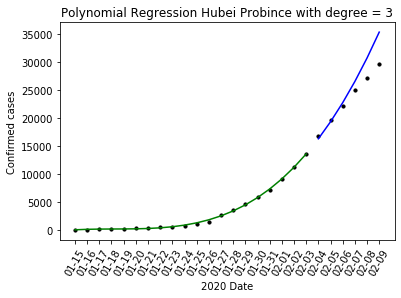

Degree 2:
RMSE of training set is 521.5785301145414
R2 score of training set is 0.9831373014738979

RMSE of test set is 3515.9418076480024
R2 score of test set is 0.3553995855236919
---------------------------------------



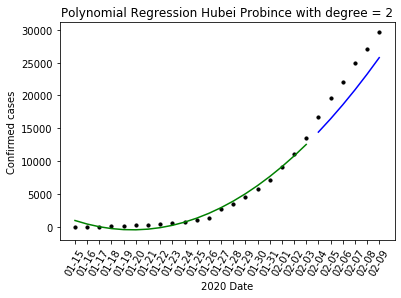


🍎Forescast the next 4 days
Degree 3:
RMSE of training set is 581.5182121451495
R2 score of training set is 0.9962110081664509

---------------------------------------



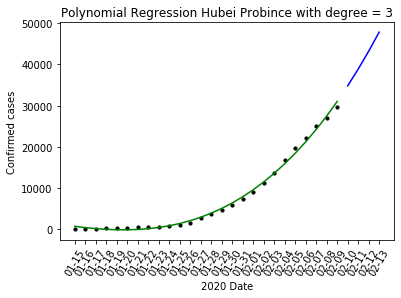

In [21]:
# See Hubei Province 
Hubei= get_province_df(China_df, "Hubei Province")
 
X_train, X_test, y_train, y_test = data_processing(Hubei, 5)    

# select the best degree 
create_polynomial_regression_model(1, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = True)
create_polynomial_regression_model(2, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(3, "Hubei Probince", Hubei)

Train dataset: data before 2020-02-04 00:00:00 
Test dataset: the last 5 days
Degree 1:
RMSE of training set is 2854.01991356579
R2 score of training set is 0.7908332503949047

RMSE of test set is 15509.142623379383
R2 score of test set is -7.264011873365975
---------------------------------------

Degree 3:
RMSE of training set is 198.1357013956916
R2 score of training set is 0.9989918988205625

RMSE of test set is 5001.613502537175
R2 score of test set is 0.14052032599281927
---------------------------------------

Degree 2:
RMSE of training set is 581.0829182967894
R2 score of training set is 0.9913292858784779

RMSE of test set is 2078.9712515239876
R2 score of test set is 0.8515048324967187
---------------------------------------



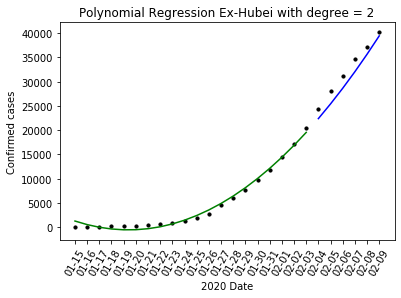


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 768.1287189961382
R2 score of training set is 0.9965595484113774

---------------------------------------



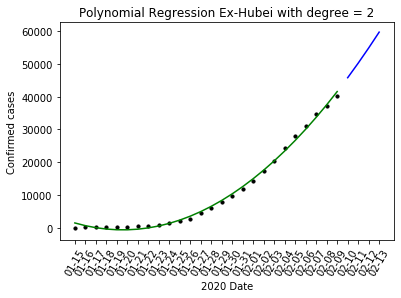

In [22]:
# See Hubei Province 
NotHubei= China_df[(China_df['province']!="Hubei Province") & (China_df['province'].isnull()) 
                   & (df['countryCode']=='CN') ]


X_train, X_test, y_train, y_test = data_processing(NotHubei, 5)    

# select the best degree 
create_polynomial_regression_model(1, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Ex-Hubei", NotHubei)